In [3]:
# you need to run this cell only the first time that you use julia/juliabox
Pkg.add("Roots")
Pkg.add("QuadGK")
Pkg.add("Optim")
Pkg.add("Plots")

UndefVarError: UndefVarError: Pkg not defined

The cell above has to be run only once (the first time you want to execute something in this notebook). If you change the utility functions below, please note that the utility function is always assumed to be increasing and concave. Utility functions that allow for reasonably simple calculations are $u(x)=\sqrt{x}$ and $u(x)=ax-bx^2$ (where $a>0$ and $b>0$ are some number that you can choose). However, you have to choose $a$ high enough to ensure that $u$ is increasing for the relevant incomes, i.e. choose $a>2b*W$ where $W$ is the income without loss. For example, if $W=2500$, then $b=0.5$ and $a=3000$ will work.

# Insurance Demand

### Exercise 1

In [3]:
# Discrete income distribution (as in 1a)

using Roots

##Primitives of the problem
#define Bernoulli utility, Array of incomes and Array of probabilities; 
#the first element of "probabilities" is the probability of having an income equal to the first element of "incomes" etc.
u(x) = √(x)
incomes = [1600,2500,3600]
probabilities = [1/3,1/3,1/3]

##Analysis

expectedIncome= sum(incomes.*probabilities)
expectedUtility = sum(u.(incomes).*probabilities)
function CE()
    return find_zero(x->expectedUtility-u(x),(minimum(incomes),maximum(incomes)))
end
RP=expectedIncome-CE()


##Output
println("expected income = ",expectedIncome,"; expected Utility =",expectedUtility)
println("certainty equivalent=", CE(),"; risk premium=", RP)


expected income = 2566.6666666666665; expected Utility =50.0
certainty equivalent=2500.0; risk premium=66.66666666666652


In [13]:
# Continuous income distributions: For simplicity, only uniform distribution in interval [a,b] is considered

using QuadGK
using Roots

##Primitives of the problem
u(x)=√(x)
#a: minimum of income interval
a = 1600
# b: maximum of income interval
b = 2500
# distribution is uniform -> density is constant and satisfies (b-a)*density=1
dens(x)=1/(b-a)

##Analysis

expectedInc = quadgk(x->dens(x)*x,a,b)[1]
expectedU = quadgk(x->dens(x)*u(x),a,b)[1]
function CEcont()
    return find_zero(x->expectedU-u(x),(a,b))
end
RP=expectedInc-CEcont()

##Output
println("expected income = ",expectedInc,"; expected Utility =",expectedU)
println("certainty equivalent=", CEcont(),"; risk premium=", RP)


expected income = 2050.0; expected Utility =45.18518518518519
certainty equivalent=2041.7009602194794; risk premium=8.299039780520616


### Exercise 3

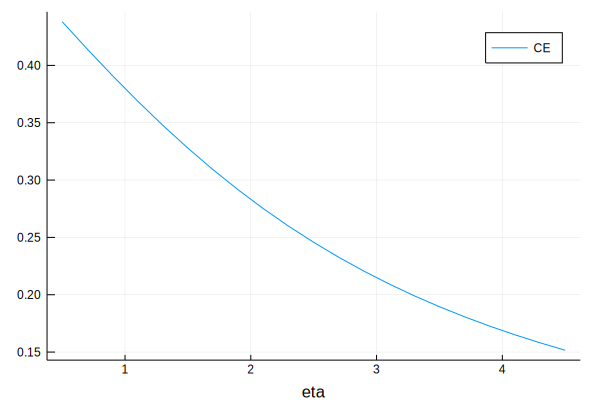

In [1]:
using Roots
using Plots

##Primitives of the problem
u(x,η) = -ℯ^(-η*x) # note that Euler's number is "ℯ" not "e"
income = 1.0
loss = 1.0
α=0.5

##Analysis

expectedIncome3 = income-α*loss
expectedUtility3(η) = α*u(income-loss,η)+(1-α)*u(income,η)

function CE3(η)
    #println(expectedUtility, u(income-loss,η),u(income,η))
    return find_zero(x->expectedUtility3(η)-u(x,η),(income-loss,income))
end

##Output

plot(0.5:0.2:4.5,CE3.(0.5:0.2:4.5),xlabel="eta",label="CE")

### Exercise 5

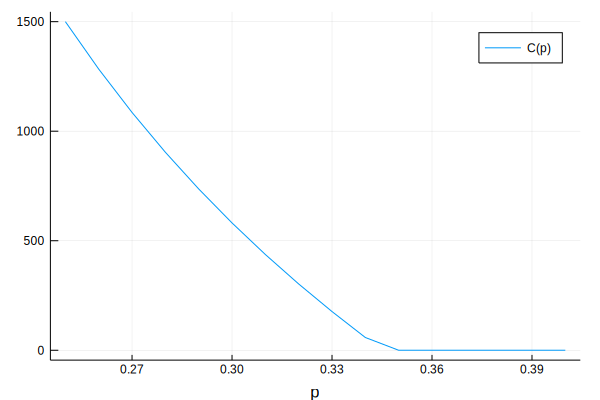

In [2]:
using Plots
using Optim

##Primitives of the problem
u(x)=√(x)
income = 2500
loss = 1500
α=0.25

##Analysis

EU(p,C)=(1-α)*u(income-p*C)+α*u(income-p*C-loss+C)

function C(p)
    return Optim.minimizer(optimize(cov->(-1.0)*EU(p,cov),0.0,loss))
end
#in exercise: C(p)= (2500-5000p-6500p^2)/(p*(1-p)*(1+8p))

##Output

plot(0.25:0.01:0.4,C,label="C(p)",xlabel="p")

### Exercise 6

In [51]:
using Plots
using Optim

##Primitives of the problemu(x)=√(x)
income = 2500
loss = 1500
α=0.25
p = 0.3
minIncome = 1500

##Analysis

EU6(C)=(1-α)*u(income-p*C)+α*u(income-p*C-loss+C)

function C()
    return Optim.minimizer(optimize(cov->(-1.0)*EU6(cov),0.0,loss))
end

expectedUtilityInsurance = EU6(C())
expectedUtilityNoInsurance = α*u(max(minIncome,income-loss))+(1-α)*u(income)

##Output

println("EU with insurance = ",expectedUtilityInsurance)
println("EU without insurance = ",expectedUtilityNoInsurance)
if expectedUtilityInsurance >= expectedUtilityNoInsurance
    println("buy insurance ")
else
    println("do not buy insurance")
end


EU with insurance = 45.545633840191115
EU without insurance = 47.18245836551854
do not buy insurance


# Adverse selection

### Exercise 1a

WTP of i=0.3 is 564.0000000000001


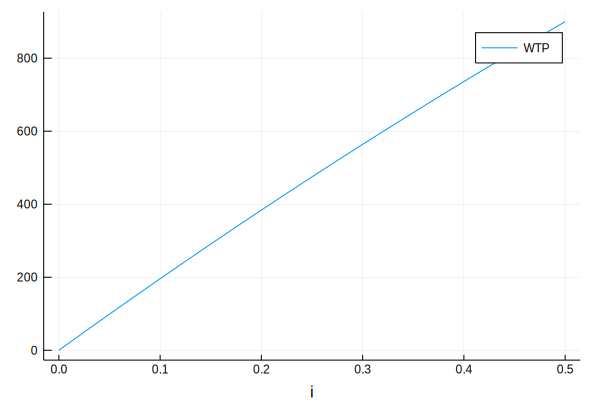

In [3]:
using Roots
using Plots

##Primitives of the problem
u(x)=√(x)
ilow = 0.0
ihigh = 0.5
income = 2500
loss = 1600
dens(x) = 0.1

##Analysis
EUnoInsurance(i) = i*u(income-loss)+(1-i)*u(income) 

function WTP(i)
    return find_zero(x->u(income-x)-EUnoInsurance(i),(0.0,loss))
end


## Output
println("WTP of i=0.3 is ", WTP(0.3))

plot(ilow:0.02:ihigh,WTP.(ilow:0.02:ihigh),xlabel="i",label="WTP")

### Exercise 1b

┌ Info: Precompiling QuadGK [1fd47b50-473d-5c70-9696-f719f8f3bcdc]
└ @ Base loading.jl:1186


demand for premium = 500 equals 0.23606797749978986


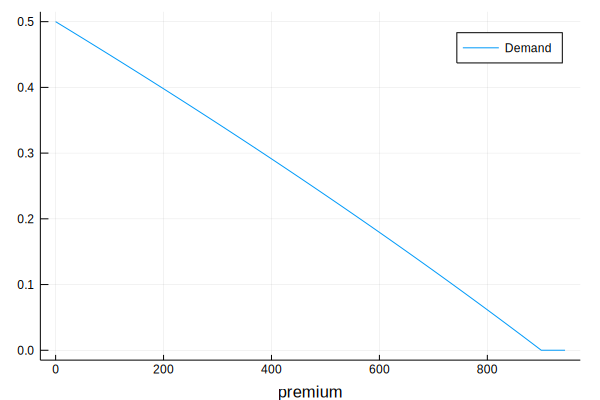

In [5]:
using Plots
using Roots
using QuadGK

##Primitives of the problem
u(x)=√(x)
ilow = 0.0
ihigh = 0.5
income = 2500
loss = 1600
dens(i) = 1.0

##Analysis
EUnoInsurance(i) = i*u(income-loss)+(1-i)*u(income) 

function WTP(i)
    return find_zero(x->u(income-x)-EUnoInsurance(i),(0.0,loss))
end

function D(p)
    if WTP(ihigh)<p #no one buys
        return 0.0
    elseif WTP(ilow)>p #everyone buys
        return quadgk(i->dens(i),ilow,ihigh)[1]
        else #only sufficiently high i buy
        indifferenti = find_zero(i->WTP(i)-p,(ilow,ihigh))
        return quadgk(i->dens(i),indifferenti,ihigh)[1]
    end
end

#in exercise: D(p)=√(6.25-p/400)-2

##Output
println("demand for premium = 500 equals ",D(500))

plot(0.9*WTP(ilow):1:WTP(ihigh)*1.05,D,xlabel="premium",label="Demand")

### Exercise 1c and 1d

In [6]:
using QuadGK
using Plots

##Primitives of the problem
u(x)=√(x)
ilow = 0.0
ihigh = 0.5
income = 2500
loss = 1600
dens(i) = 1.0

##Analysis

MC(i) = i*loss

#gives mass of people below j
pseudoCDF(j)=quadgk(i->dens(i),ilow,j)[1]
#total measure of the population
totalMeasure = pseudoCDF(ihigh)

#average cost if all between j and ihigh buy
function AC(j)
    if j<ihigh-1e-3 #to avoid numerical problems with integration due to division by "almost 0"
        return quadgk(i-> MC(i)*dens(i)/(totalMeasure-pseudoCDF(j)),j,ihigh)[1]
    else
        return (MC(j)+MC(ihigh))/2
    end
end

#example output
println("MC of person 0.3 equals ",MC(0.3))
println("AC of person 0.3 equals ",AC(0.3))


MC of person 0.3 equals 480.0
AC of person 0.3 equals 640.0


### Exercise 1e-1h

equilibrium premium = 705.5728090000844; equilibrium quantity = 0.11803398874989457
equilibrium welfare = 11.584138583382387
first best welfare = 33.33333333333334
minimum subsidy for efficiency (i.e. everyone insured) = 400.00000000000006
A mandate makes i>0.2087121525220804 worse off and everyone else better off


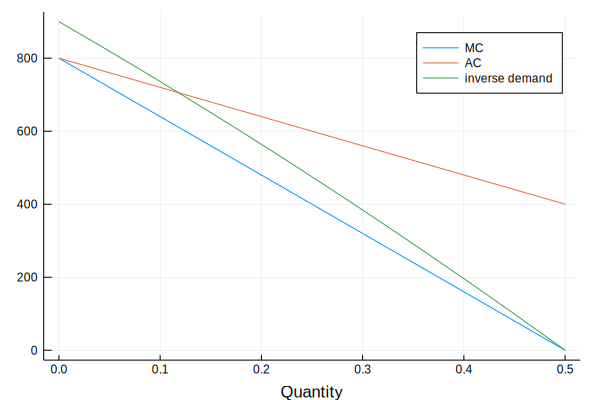

In [7]:
using QuadGK
using Roots
using Plots

##Primitives of the problem
u(x)=√(x) #the code only works properly if u is increasing and concave on (income-loss,income)

#lowest and highest risk in the market
ilow = 0.0
ihigh = 0.5

income = 2500
loss = 1600

#constant density means every risk is equally likely; 
#note that the density can be "improper", i.e. does not have to integrate to 1
dens(i) = 1.0 

##Analysis
EUnoInsurance(i) = i*u(income-loss)+(1-i)*u(income) 

function WTP(i)
    return find_zero(x->u(income-x)-EUnoInsurance(i),(0.0,loss))
end

function D(p)
    if WTP(ihigh)<p #no one buys
        return 0.0
    elseif WTP(ilow)>p #everyone buys
        return quadgk(i->dens(i),ilow,ihigh)[1]
    else #only sufficiently high i buy
        indifferenti = find_zero(i->WTP(i)-p,(ilow,ihigh))
        return quadgk(i->dens(i),indifferenti,ihigh)[1]
    end
end

MC(i) = i*loss

#gives mass of people below j
pseudoCDF(j)=quadgk(i->dens(i),ilow,j)[1]
totalMeasure = pseudoCDF(ihigh)

#average cost if all between j and ihigh buy
function AC(j)
    if j<ihigh-1e-3 #to avoid numerical problems with integration
        return quadgk(i-> MC(i)*dens(i)/(totalMeasure-pseudoCDF(j)),j,ihigh)[1]
    else
        return (MC(j)+MC(ihigh))/2
    end
end
        
#inverse demand: gives the premium at which measure Q of people buy
function invDemand(Q)
    if Q>totalMeasure
        println("there are not as many people in the market")
        return nothing
    elseif Q<0
        println("negative measure makes no sense")
        return nothing
    else
        return find_zero(p->Q-D(p),(WTP(ilow),WTP(ihigh)))
    end
end

function equilibrium()
    if AC(ilow)<WTP(ilow)
        return AC(ilow),1
    else
        indifferenti(p) = find_zero(i->WTP(i)-p,(ilow,ihigh))
        pstar = find_zero(p->p-AC(indifferenti(p)),(WTP(ilow),WTP(ihigh)))
        Qstar = D(pstar)
        return pstar,Qstar
    end
end

pstar,Qstar = equilibrium()
println("equilibrium premium = ",pstar,"; equilibrium quantity = ",Qstar)


##exercise 1f
function eqWelfare()
    criticali = find_zero(i->totalMeasure-pseudoCDF(i)-Qstar,(ilow,ihigh))
    return quadgk(i->(WTP(i)-MC(i))*dens(i),criticali,ihigh)[1]
end

function firstBestW()
    return quadgk(i->max(0.0,(WTP(i)-MC(i)))*dens(i),ilow,ihigh)[1]
end

println("equilibrium welfare = ",eqWelfare())
println("first best welfare = ",firstBestW())

##exercise 1g
function subsidy()
    return max(0.0,AC(ilow)-WTP(ilow))
end

println("minimum subsidy for efficiency (i.e. everyone insured) = ",subsidy())

##exercise 1h
function mandateLoser()
    if WTP(ilow)<AC(ilow)
        return find_zero(i->WTP(i)-AC(ilow),(ilow,ihigh))
    else
        return ihigh
    end
end

println("A mandate makes i>",mandateLoser()," worse off and everyone else better off")

##plot as in lecture

# average cost as function of sold quantity
function ACq(Q)
    criticali = find_zero(i->totalMeasure-pseudoCDF(i)-Q,(ilow,ihigh))
    return AC(criticali)
end

# marginal cost as function of sold quantity
function MCq(Q)
    criticali = find_zero(i->totalMeasure-pseudoCDF(i)-Q,(ilow,ihigh))
    return MC(criticali)
end

plot(0:0.01:totalMeasure,[MCq.(0:0.01:totalMeasure),ACq.(0:0.01:totalMeasure),invDemand.(0:0.01:totalMeasure)],xlabel="Quantity",label=["MC","AC","inverse demand"])

   

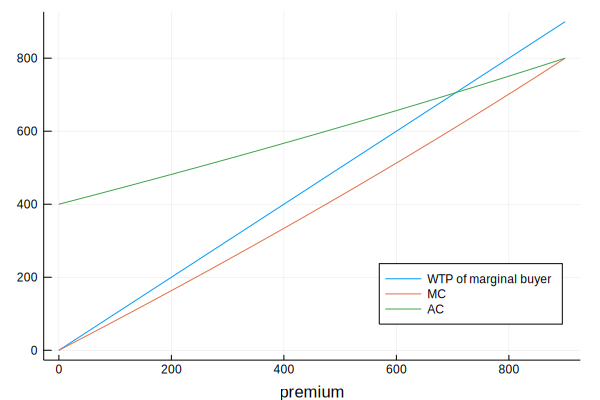

In [8]:
#Quick plot for parameters as in exercise (solved by hand in class)

## Plots with premium on horizontal axis, i.e. a flipped around version of the plot just below
using Plots
# critical i(p), i.e. i(p) is indifferent between buying and not buying if the premium is p
i(p) = 2.5-√(6.25-p/400)
# marginal cost of the critical i
MC(p) = 1600*i(p)
# average cost of critical i
AC(p) = 1600*(0.5+i(p))/2
# willingness to pay of i(p)
WTP(p) = 2000*i(p)-400*(i(p))^2

plot(0:1:900,[WTP,MC,AC],xlabel="premium", label=["WTP of marginal buyer","MC","AC"],legend=:bottomright)

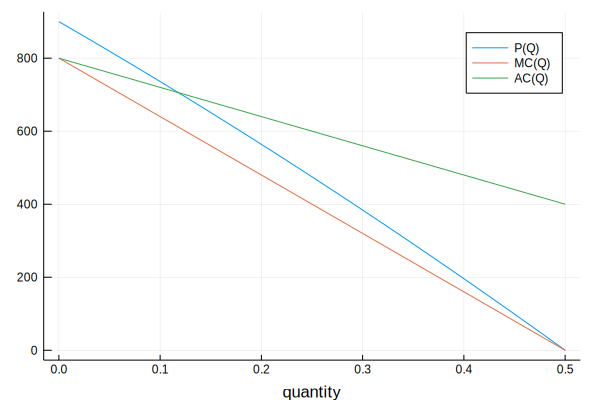

In [9]:
#Quick plot for parameter as in exercise (solved by hand in class)

##Plot with quantity on horizontal axis (as in lecture)
# indifferent person in case Q units are sold (to people in [1/2-Q,1/2])
icrit(Q)=1/2-Q
# average costs
AC(Q) = 1600*(icrit(Q)+.5)/2
# marginal cost
MC(Q) = 1600*icrit(Q)
#inverse demand
P(Q) = 2000*icrit(Q)-400*(icrit(Q))^2

plot(0:0.01:0.5,[P,MC,AC],xlabel="quantity",label=["P(Q)","MC(Q)","AC(Q)"])


## Rothschild Stiglitz

### Exercise 4

full information equilibrium: 
high risk: premium=2.5 full coverage; low risk: premium=1.25 full coverage
RS equilibrium is: ph=2.5 ; qh=1; pl=0.41937515251342977; ql=0.3355001220107438
this equilibrium exists for all gamma greater than 0.3900029916572685
RS equilibrium candidate is broken by full coverage contract if gamma is less than 0.33651123646547126


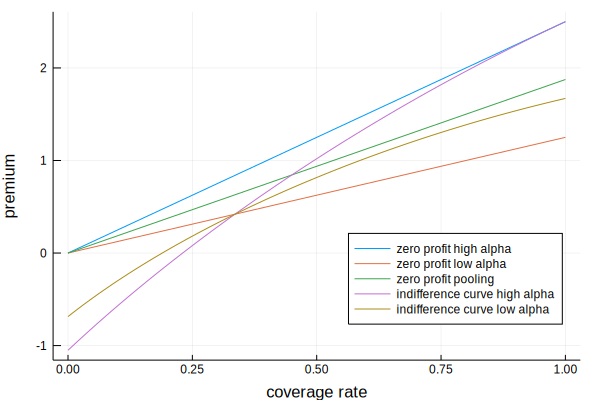

In [10]:
using Plots
using Roots
using Optim

##Primitives of the problem
#utility
u(x)=-0.5*x^2+10*x

#low and high risk in the market
alphalow = 0.25
alphahigh = 0.5

#share of high risks
gamma = 0.5

income = 9
loss = 5

# expected profits
pi(alpha,p,q)=p-alpha*q*loss

#expected utility without insurance
u0(alpha) = alpha*u(income-loss)+(1-alpha)*u(income)

##Ex 4a-d
#gives the premium yielding profit pi at coverage q if the insured has risk alpha
isoprofitp(pi,q,alpha)=pi+alpha*q*loss

#gives the premium yielding expected utility ubar at coverage q if the insured has risk alpha
function indifferencep(ubar,q,alpha)
    expU(p) = alpha*u(income-p-loss*(1-q))+(1-alpha)*u(income-p)
    return find_zero(p->expU(p)-ubar, alpha*loss*q) 
end

# high risk types
pStarHighFullInfo = isoprofitp(0.0,1.0,alphahigh) 
pStarLowFullInfo = isoprofitp(0.0,1.0,alphalow) 


println("full information equilibrium: ")
println("high risk: premium=",pStarHighFullInfo," full coverage","; low risk: premium=",pStarLowFullInfo," full coverage")

plot(0:0.01:1,[q->isoprofitp(0.0,q,alphahigh),q->indifferencep(u(income-pStarHighFullInfo),q,alphahigh)],label=["isoprofit high alpha","indifference curve high alpha"],legend=:bottomright,xlabel="coverage rate",ylabel="premium")


# Ex 4e
function RSeq() 
    uh = u(income-loss*alphahigh) #full coverage and zero profits for high contract
    pl(ql)=alphalow*ql*loss #zero profits for low contract
    EUhl(ql) = alphahigh*u(income-pl(ql)-(1-ql)*loss)+(1-alphahigh)*u(income-pl(ql))
    qlstar = find_zero(ql->EUhl(ql)-uh,(0,1))
    return loss*alphahigh,1.0,pl(qlstar),qlstar
end

phstar, qhstar, plstar, qlstar = RSeq()
ulstar = alphalow*u(income-plstar-(1-qlstar)*loss)+(1-alphalow)*u(income-plstar)

# computes critical share of high risk types for RSeq existence
function critGam()
    difference(gam)=Optim.minimum(optimize(q->isoprofitp(0.0,q,gam*alphahigh+(1-gam)*alphalow)-indifferencep(ulstar,q,alphalow),qlstar,1.0))
    return find_zero(difference,(0,1))
end

#critical gamma such that RS eq candidate is broken by full coverage pooling contract for lower gamma
function critGamFullCov()
    pl1 = indifferencep(ulstar,1.0,alphalow)
    return find_zero(gam->isoprofitp(0.0,1.0,gam*alphahigh+(1-gam)*alphalow)-pl1,(0,1))
end

if gamma>=critGam()
    println("RS equilibrium is: ph=",phstar," ; qh=1; pl=",plstar,"; ql=",qlstar)
    println("this equilibrium exists for all gamma greater than ",critGam())
else
    println("RS equilibrium  candidate is: ph=",phstar," ; qh=1; pl=",plstar,"; ql=",qlstar)
    println("However, RS equilibrium does not exist (i.e. is broken by pooling contract) for gamma less than ", critGam())
end

println("RS equilibrium candidate is broken by full coverage contract if gamma is less than ",critGamFullCov())

plot(0:0.01:1,[q->isoprofitp(0.0,q,alphahigh),q->isoprofitp(0.0,q,alphalow),q->isoprofitp(0.0,q,gamma*alphahigh+(1-gamma)*alphalow),q->indifferencep(u(income-pStarHighFullInfo),q,alphahigh),q->indifferencep(ulstar,q,alphalow)],label=["zero profit high alpha","zero profit low alpha","zero profit pooling","indifference curve high alpha","indifference curve low alpha"],legend=:bottomright,xlabel="coverage rate",ylabel="premium")
#savefig("RSE.png")

## Advantageous selection

#### Exercise 2

wilingness to pay for eta=1 and alpha = 0.3 is 3.811626763587185
wilingness to pay for eta=2 and alpha = 0.2 is 3.928514654287554
wilingness to pay for eta=1 and alpha = 0.2 is 3.417157072908292
wilingness to pay for eta=1 and alpha = 0.2 is 4.198211262568489


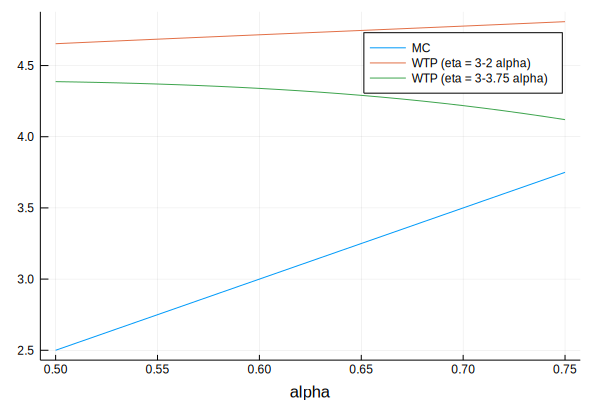

In [11]:
# use package for solving equations
using Roots
using Plots

# utility function
u(x,eta)=-ℯ^(-eta*x)

# Parameters
W = 10.0
L = 5.0

#expected utilitywithout insurance
EU(eta,alpha) = alpha*u(W-L,eta)+(1-alpha)*u(W,eta)

# determine willingness to pay for full insurance
function WTP(alpha, eta)
    return find_zero(p->u(W-p,eta)-EU(eta,alpha),alpha*L)
end

# exercise (a)
println("wilingness to pay for eta=1 and alpha = 0.3 is ",WTP(.3,1))
println("wilingness to pay for eta=2 and alpha = 0.2 is ",WTP(.2,1.5))
#exercise (b)
println("wilingness to pay for eta=1 and alpha = 0.2 is ",WTP(.2,1))
# exercise (c)
println("wilingness to pay for eta=1 and alpha = 0.2 is ",WTP(.3,1.5))

#exercise (d)
plot(0.5:0.01:.75,[L*(0.5:0.01:.75), [WTP(alpha,3-2*alpha) for alpha in 0.5:0.01:.75],[WTP(alpha,3-3.75*alpha) for alpha in 0.5:0.01:.75]],labels=["MC","WTP (eta = 3-2 alpha)","WTP (eta = 3-3.75 alpha)"],xlabel="alpha")

# Moral Hazard

### Consumer optimal coverage level

Optimal coverage level equals 0.3991679605896161


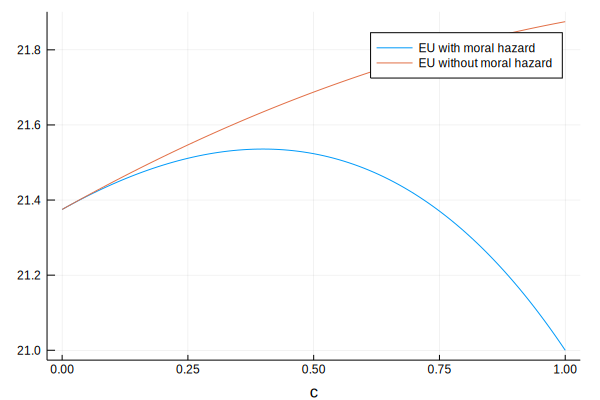

In [12]:
using Optim
using Plots

u(x)=10x-x^2
alpha=0.5
W=4
L=2
f(M)=2M-0.5*M^2
Mbar = 2

# computes optimal treatment
function Mstar(c)
    return Optim.minimizer(optimize(M->-(W-L+f(M)-(1-c)*M),0,Mbar))
end

#computes expected utility given coverage rate c and fair premium
function EU(c)
    M = Mstar(c)
    return alpha*u(W-L-alpha*M*c+f(M)-(1-c)*M)+(1-alpha)*u(W-alpha*M*c)
end

#computes expected utility if M is fixed at first best level
function EUfixM(c)
    M = Mstar(0.0)
    return alpha*u(W-L-alpha*M*c+f(M)-(1-c)*M)+(1-alpha)*u(W-alpha*M*c)
end

function OptimalC()
    return Optim.minimizer(optimize(c->(-1)*EU(c),0,1.0))
end

println("Optimal coverage level equals ",OptimalC())
plot(0:0.01:1,[EU.(0:0.01:1),EUfixM.(0:0.01:1)],xlabel="c",label=["EU with moral hazard","EU without moral hazard"])
